In [23]:
#from understatscraper import Understat
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from mplsoccer.pitch import Pitch, VerticalPitch
from understat import Understat
import asyncio
import json
import aiohttp
import nest_asyncio
nest_asyncio.apply()
import matplotlib.gridspec as gridspec


In [12]:
understat = Understat(session)

In [33]:
async with aiohttp.ClientSession() as session:
        understat = Understat(session)
        player_shots = await understat.get_player_shots(
            1852)
        df = pd.DataFrame(player_shots)

In [14]:
len(df[df['result']=='Goal'])

45

In [4]:
#creating dataframe

#ids = [2015,2016,2017,2018,2019,2020,2021]
ids = [2021]

df = pd.DataFrame()
for x in ids:
    df_firmino = understat.season('EPL', x, team='Liverpool', player='Roberto Firmino')
    df = df.append(df_firmino)

In [37]:
df.to_csv('firmino.csv')

In [32]:
arsenal = df[(df['h_team']=='Arsenal') |(df['a_team']=='Arsenal')]

In [71]:
arsenal['result'].value_counts()

BlockedShot    12
MissedShots    10
Goal            9
SavedShot       4
ShotOnPost      2
Name: result, dtype: int64

In [64]:
arsenal[['X','Y','xG']] = arsenal[['X','Y','xG']].apply(pd.to_numeric,axis=1)
xG = round(arsenal['xG'].sum(),2)
goal = len(arsenal[arsenal['result']=='Goal'])
conversion = round(len(arsenal[arsenal['result']=='Goal'])/len(arsenal),2)
arsenal[['X','Y']] = arsenal[['X','Y']]*100

In [38]:
xG = round(arsenal['xG'].sum(),2)

In [43]:
goal = len(arsenal[arsenal['result']=='Goal'])

In [49]:
conversion = round(len(arsenal[arsenal['result']=='Goal'])/len(arsenal),2)

In [69]:
arsenal[['X','Y']] = arsenal[['X','Y']]*100

### Creating Shot Map

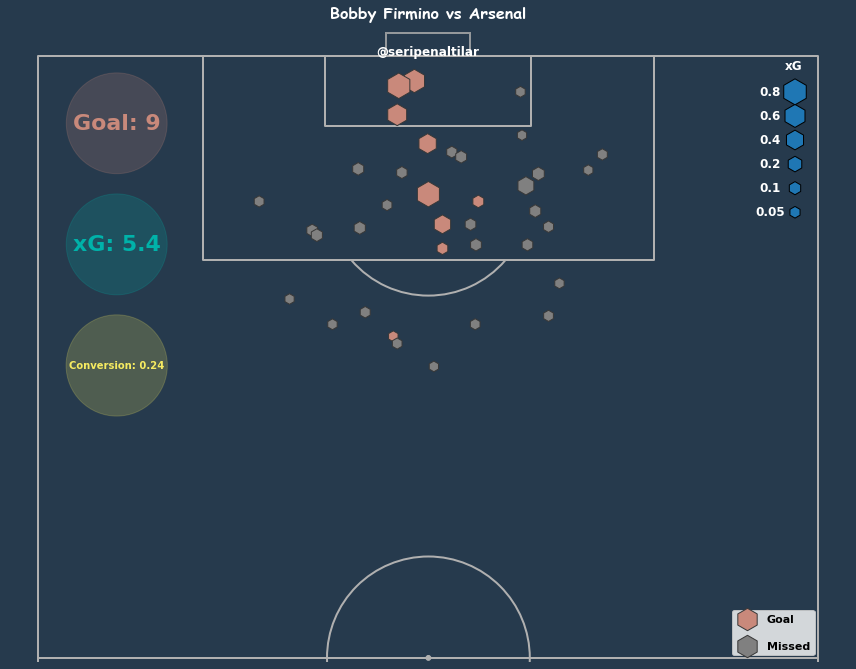

In [154]:
pitch = VerticalPitch(pad_bottom=0.5,
                     half=True,
                     goal_alpha=0.8,
                     goal_type='box',
                     pitch_type='opta',
                     pitch_color='#263a4d'
                     )

fig, ax = pitch.draw(figsize=(12,10))

fig.patch.set_facecolor('#263a4d')

pitch.scatter(arsenal[arsenal['result']=='Goal']['X'],arsenal[arsenal['result']=='Goal']['Y'],
              s=(arsenal[arsenal['result']=='Goal']['xG']*720)+100,c='#c9897b',marker='h',ax=ax,label='Goal',
              edgecolors='#383838')

pitch.scatter(arsenal[arsenal['result']!='Goal']['X'],arsenal[arsenal['result']!='Goal']['Y'],
              s=(arsenal[arsenal['result']!='Goal']['xG']*720)+100,c='#808080',marker='h',ax=ax,label='Missed',
             edgecolors='#383838')

# legends

legend = ax.legend(bbox_to_anchor=(0.965,0.09),labelspacing=1.5,prop={'weight':'bold','size':11})
legend.legendHandles[0]._sizes = [500]
legend.legendHandles[1]._sizes = [500]

mSize = [0.05,0.10,0.2,0.4,0.6,0.8]
mSizeS = [720 * i for i in mSize]
mSizeS = [100 + i for i in mSizeS]

mx = [3,3,3,3,3,3]
my = [87,89,91,93,95,97]

plt.scatter(mx,my,s=mSizeS,edgecolor='black',marker='h')
for i in range(len(mx)):
    plt.text(mx[i]+3.2,my[i],mSize[i],fontsize=12,c='white',ha='center',va='center',fontweight='bold')
    
plt.figtext(0.44,0.9,'@seripenaltilar',fontweight='bold',fontsize=12,color='white')
plt.figtext(0.9125,0.88,'xG',fontweight='bold',fontsize=12,color='white')

font = {'family': 'Comic Sans MS',
       'color': 'black',
       'weight': 'bold',
       'size': 16
       }

plt.text(0.13,0.8450, 'Goal: {}'.format(goal),size=22,
        ha='center',va='center',transform=ax.transAxes,
        color='#c9897b',fontweight='bold',
        bbox=dict(boxstyle='circle',color='#c9897b',alpha=0.20)
        )

plt.text(0.13,0.6550, 'xG: {}'.format(xG),size=22,
        ha='center',va='center',transform=ax.transAxes,
        color='#00B2A9',fontweight='bold',
        bbox=dict(boxstyle='circle',color='#00B2A9',alpha=0.20)
        )

plt.text(0.13,0.4650, 'Conversion: {}'.format(conversion),size=10,
        ha='center',va='center',transform=ax.transAxes,
        color='#F6EB61',fontweight='bold',
        bbox=dict(boxstyle='circle',color='#F6EB61',alpha=0.20)
        )

plt.title('Bobby Firmino vs Arsenal',fontdict=font,color='white')
plt.show()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               313 non-null    object
 1   minute           313 non-null    object
 2   result           313 non-null    object
 3   X                313 non-null    object
 4   Y                313 non-null    object
 5   xG               313 non-null    object
 6   player           313 non-null    object
 7   h_a              313 non-null    object
 8   player_id        313 non-null    object
 9   situation        313 non-null    object
 10  season           313 non-null    object
 11  shotType         313 non-null    object
 12  match_id         313 non-null    object
 13  h_team           313 non-null    object
 14  a_team           313 non-null    object
 15  h_goals          313 non-null    object
 16  a_goals          313 non-null    object
 17  date             313 non-null    ob

In [ ]:
arsenal[['X','Y','xG']] = arsenal[['X','Y','xG']].apply(pd.to_numeric,axis=1)
xG = round(arsenal['xG'].sum(),2)
goal = len(arsenal[arsenal['result']=='Goal'])
conversion = round(len(arsenal[arsenal['result']=='Goal'])/len(arsenal),2)
arsenal[['X','Y']] = arsenal[['X','Y']]*100

In [27]:
df

,id,minute,result,x,y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,95625,36,BlockedShot,86.800003,69.300003,0.041596,Ante Rebic,h,1852,OpenPlay,2015,RightFoot,597,Fiorentina,Bologna,2,0,2015-09-23 22:45:00,Marcos Alonso,Pass
1,95627,45,MissedShots,93.099998,56.099998,0.127136,Ante Rebic,h,1852,OpenPlay,2015,Head,597,Fiorentina,Bologna,2,0,2015-09-23 22:45:00,Jakub Blaszczykowski,Cross
2,98285,15,MissedShots,79.699997,26.100000,0.020101,Ante Rebic,h,1852,OpenPlay,2015,LeftFoot,653,Fiorentina,Frosinone,4,1,2015-11-01 15:30:00,Borja Valero,Pass
3,98289,23,Goal,82.199997,19.600000,0.013585,Ante Rebic,h,1852,OpenPlay,2015,RightFoot,653,Fiorentina,Frosinone,4,1,2015-11-01 15:30:00,Matías Fernández,Pass
4,98291,24,ShotOnPost,81.500000,49.900002,0.070693,Ante Rebic,h,1852,OpenPlay,2015,LeftFoot,653,Fiorentina,Frosinone,4,1,2015-11-01 15:30:00,None,Goal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,517670,47,MissedShots,88.599998,45.599998,0.058810,Ante Rebic,h,1852,OpenPlay,2022,Head,18867,AC Milan,Empoli,0,0,2023-04-07 19:00:00,Davide Calabria,Cross
309,519240,19,SavedShot,92.000000,50.200001,0.103073,Ante Rebic,a,1852,OpenPlay,2022,Head,18872,Bologna,AC Milan,1,1,2023-04-15 13:00:00,Alessandro Florenzi,Cross
310,519245,34,BlockedShot,91.000000,58.099998,0.089451,Ante Rebic,a,1852,OpenPlay,2022,LeftFoot,18872,Bologna,AC Milan,1,1,2023-04-15 13:00:00,Fode Toure,Cross
311,521659,31,SavedShot,89.599998,60.400002,0.031291,Ante Rebic,h,1852,OpenPlay,2022,Head,18891,AC Milan,Lecce,2,0,2023-04-23 16:00:00,Fikayo Tomori,Chipped


In [118]:
async with aiohttp.ClientSession() as session:
        understat = Understat(session)
        player_shots = await understat.get_player_shots(
            966)
        df = pd.DataFrame(player_shots)

In [ ]:
#1852

In [93]:
def shot_map(df,ax,text):
    
    df.rename(columns={'X': 'x', 'Y': 'y'},inplace=True) 
    df[['x','y','xG']] = df[['x','y','xG']].apply(pd.to_numeric,axis=1)
    xG_sum = round(df['xG'].sum(),2)
    goal = len(df[df['result']=='Goal'])
    conversion = round(len(df[df['result']=='Goal'])/len(df),2)
    xG_shot = xG_sum/len(df)
    df[['x','y']] = df[['x','y']]*100
    df['x'] = (df['x']*105)/100
    df['y'] = (df['y']*68)/100
    
    pitch = VerticalPitch(pad_bottom=0.5,
                     half=True,
                     goal_alpha=0.8,
                     goal_type='box',
                     pitch_type='uefa',
                     pitch_color='#37373f'
                     )
    
    pitch.draw(ax=ax)

    ax.set_facecolor(color='#37373f')


    pitch.scatter(df[df['result']!='Goal']['x'],
              df[df['result']!='Goal']['y'],
              s=(df[df['result']!='Goal']['xG']*720)+100,
              c='#808080',marker='h',ax=ax,label='Missed',alpha=0.95,
              edgecolors='#383838'
    )

    pitch.scatter(df[df['result']=='Goal']['x'],
              df[df['result']=='Goal']['y'],
              s=(df[df['result']=='Goal']['xG']*720)+100,
              c='#c9897b',marker='h',ax=ax,label='Goal',alpha=0.95,
              edgecolors='#383838'
)

    x_circle, y_circle = semicircle(104.8 - df['x'].median(), 34, 104.8)  # function call
    ax.plot(x_circle, y_circle, ls='--', color='#9ac9b6', lw=3)

    ax.text(40,110,'<---- median distance', color='#9ac9b6', ha='left', va='top',weight='bold',size=13)
    ax.text(40,110,f"{(((105 - df['x'].median())*18)/16.5)*0.9144:.1f} mts.",color='#9ac9b6',
        ha='right',
        va='top',weight='bold',size=13
    )


    ax.text(52,65,'{}'.format(goal),size=22,
        ha='center',va='center',
        color='#9ac9b6',fontweight='bold',
        bbox=dict(boxstyle='sawtooth',color='#9ac9b6',alpha=0.20)
            )

    ax.text(40,65,'{}'.format(round(xG_sum,1)),size=22,
        ha='center',va='center',
        color='#9ac9b6',fontweight='bold',
        bbox=dict(boxstyle='sawtooth',color='#9ac9b6',alpha=0.20)
            )

    ax.text(28,65,'{}'.format(round(conversion,2)),size=22,
        ha='center',va='center',
        color='#9ac9b6',fontweight='bold',
        bbox=dict(boxstyle='sawtooth',color='#9ac9b6',alpha=0.20)
            )


    ax.text(16,65,'{}'.format(round(xG_shot,2)),size=22,
        ha='center',va='center',
        color='#9ac9b6',fontweight='bold',
        bbox=dict(boxstyle='sawtooth',color='#9ac9b6',alpha=0.20)
            )
    x_loc = [52.2,40,28,15.5]
    x_text = ['Goal','xG','Conversion','xG/Shot']
    x_dict = dict(zip(x_loc,x_text))
    for a,b in x_dict.items():
        ax.text(a,68.5,b,size=13,ha='center',va='center',color='#9ac9b6',fontweight='bold')
        
    ax.text(35,112,text,size=13,ha='center',va='center',color='white',weight='bold',fontfamily='Comic Sans MS')

    return ax

In [69]:
def semicircle(r, h, k):
    x0 = h - r  # determine x start
    x1 = h + r  # determine x finish
    x = np.linspace(x0, x1, 10000)  # many points to solve for y

    # use numpy for array solving of the semicircle equation
    y = k - np.sqrt(r**2 - (x - h)**2)  
    return x, y

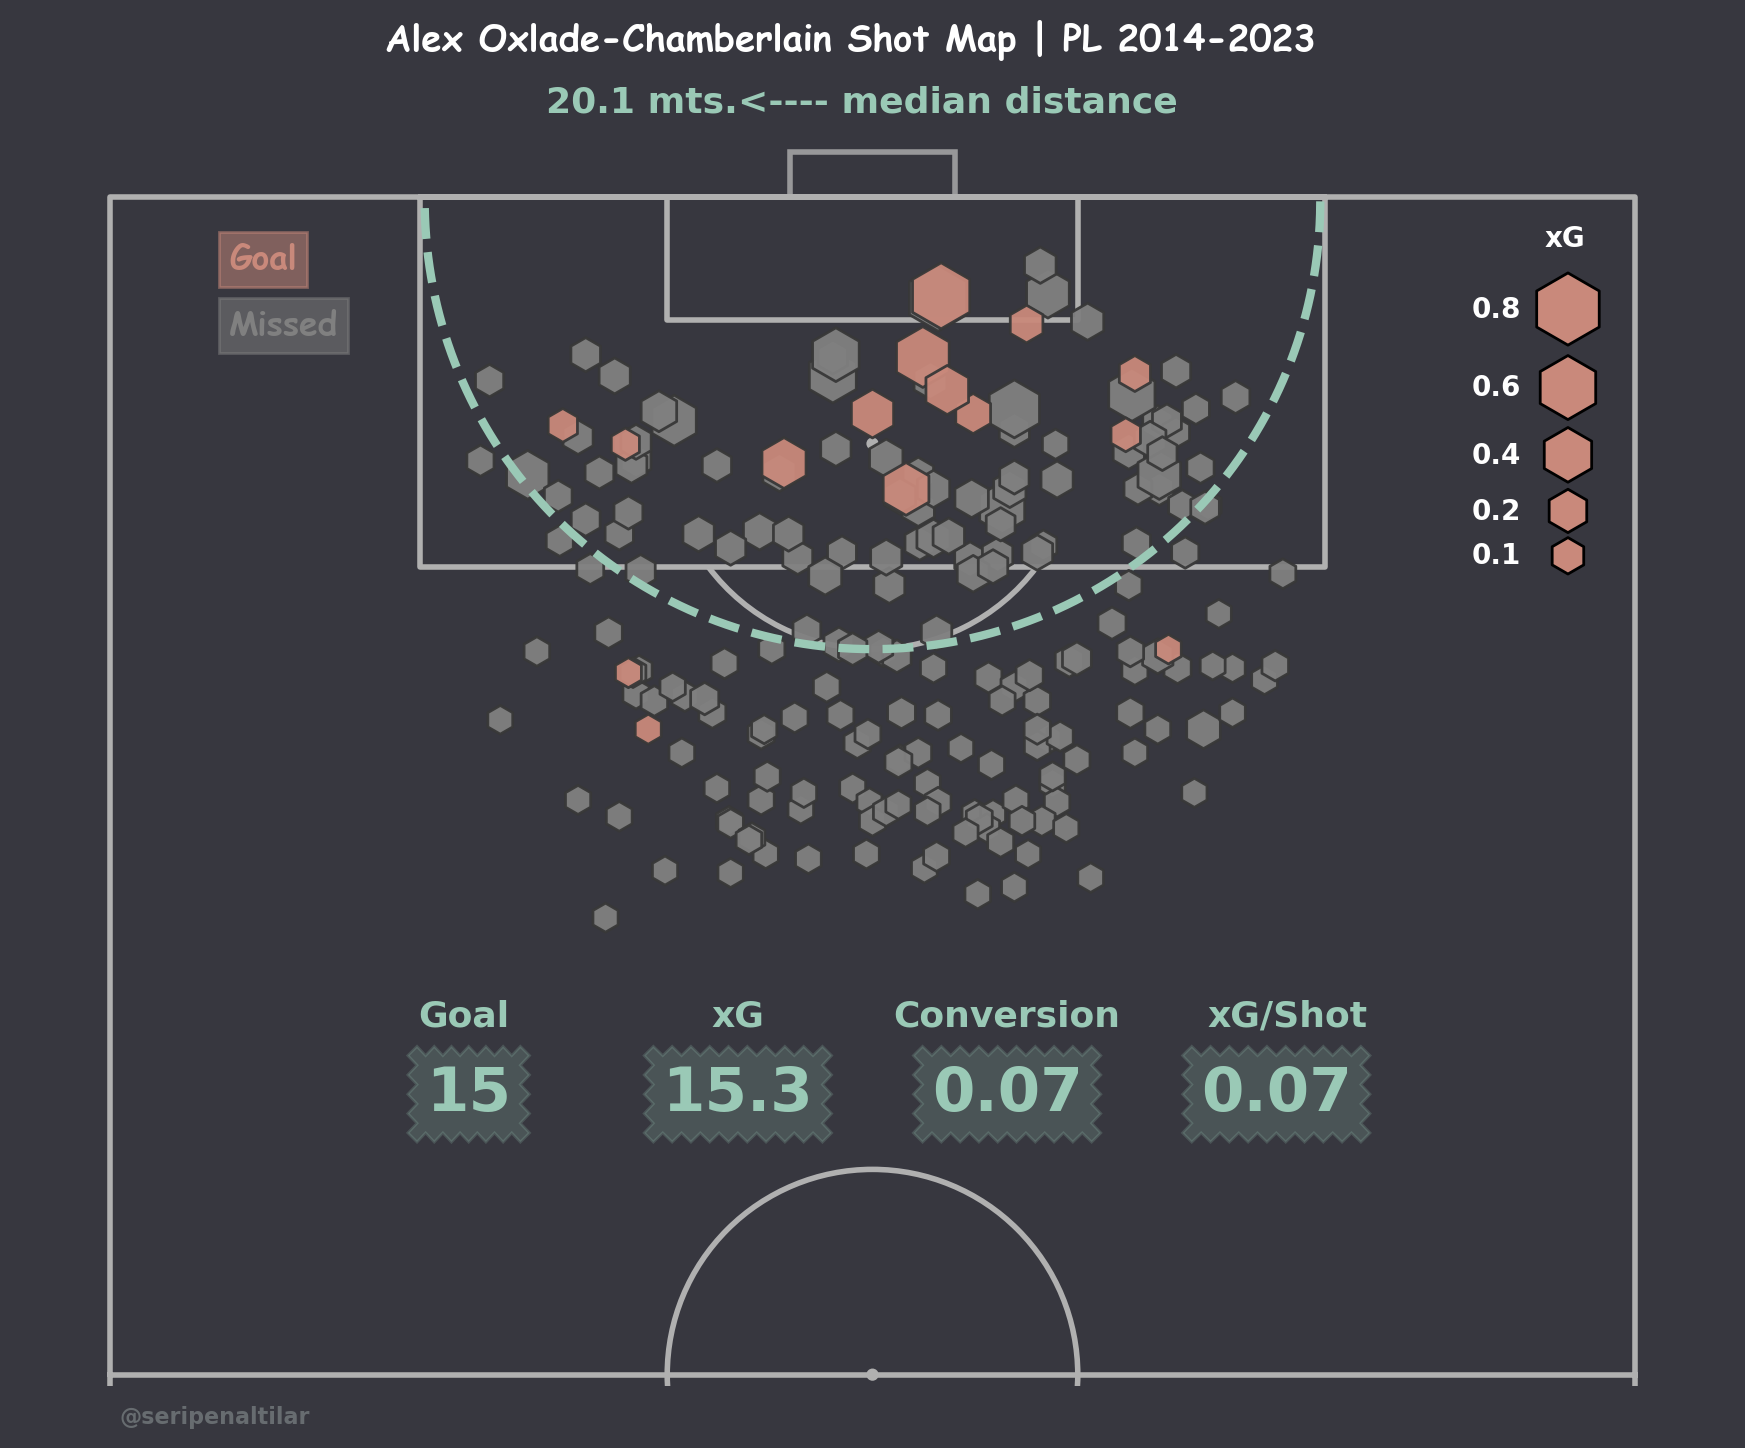

In [119]:
fig = plt.figure(figsize = (11,11), dpi = 200)


fig.patch.set_facecolor('#37373f')

gspec = gridspec.GridSpec(
    ncols=1, nrows=1, figure=fig, 
)

ax = plt.subplot(
    gspec[0,0]
)

shot_map(df=df,ax=ax,text='Alex Oxlade-Chamberlain Shot Map | PL 2014-2023')

plt.subplots_adjust(wspace=0, hspace=-.35)
#plt.figtext(0.37,0.65,'Shot Map of Mauro Icardi | Galatasaray | 2022/2023',size=20,color='white',fontfamily ='Comic Sans MS',weight='bold')
plt.figtext(0.22,0.72,'Goal',size=12,color='#c9897b',fontfamily ='Comic Sans MS',weight='bold',
           bbox=dict(boxstyle='square',color='#c9897b',alpha=0.50)
            )

plt.figtext(0.22,0.69,'Missed',size=12,color='#808080',fontfamily ='Comic Sans MS',weight='bold',
           bbox=dict(boxstyle='square',color='#808080',alpha=0.50)
            )

plt.figtext(0.17,0.195,"@seripenaltilar",
            fontweight='bold',fontsize=8,color='#676c70')

mSize = [0.10,0.2,0.4,0.6,0.8]
mSizeS = [720 * i for i in mSize]
mSizeS = [100 + i for i in mSizeS]

mx = [3,3,3,3,3]
my = [89,91,93.5,96.5,100]

plt.scatter(mx,my,s=mSizeS,edgecolor='black',marker='h',color='#c9897b')
for i in range(len(mx)):
    plt.text(mx[i]+3.2,my[i],mSize[i],fontsize=10,c='white',ha='center',va='center',fontweight='bold')
    
plt.figtext(0.818,0.73,'xG',fontweight='bold',fontsize=10,color='white')
plt.show()